# $\phi^4$ theory using openparticle

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from openparticle import ParticleOperator, generate_matrix, Fock
from numpy.linalg import eigh

/home/kserafin/projects/OpenParticle/.venv/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


$$
\mathcal{L} \ = \ \frac{1}{2} \partial_\mu \phi \partial^\mu \phi - \frac{1}{2} m^2 \phi^2 - g \phi^4
$$

$$
\phi(x)
\ = \ 
\int\frac{dp^+ d^2p^\perp}{16\pi^3 p^+} \theta(p^+)
\left(
  e^{-i p x} a_{p}
+ e^{i p x} a_{p}^\dagger
\right)
$$

$$
\widetilde{\phi}(x^+, q^+, q^\perp)
\ = \ 
\int dx^- d^2 x^\perp
\ e^{\frac{i}{2} q^+ x^- - i q^\perp x^\perp}
\ \phi(x)
$$

$$
\widetilde{\phi}(x^+ = 0, q^+, q^\perp)
\ = \ 
\frac{
  \theta(q^+) a_{q}
+ \theta(-q^+) a_{-q}^\dagger
}{|q^+|}
$$

$$
H
\ = \ 
\int dx^- d^2 x^\perp
\mathcal{H}
$$

$$
\mathcal{H}
\ = \ 
:\frac{1}{2} \phi
  \left[ (i\partial^\perp)^2 + m^2 \right] \phi:
+ g : \phi^4 :
\ ,
$$

$$
H_I
\ = \ 
g
\int dx^- d^2 x^\perp
:\phi^4(x):
\ = \ 
g
\int dx^- d^2 x^\perp
\int\frac{dq_1^+ d^2q_1^\perp}{16\pi^3}
\int\frac{dq_2^+ d^2q_2^\perp}{16\pi^3}
\int\frac{dq_3^+ d^2q_3^\perp}{16\pi^3}
\int\frac{dq_4^+ d^2q_4^\perp}{16\pi^3}
e^{-i(q_1 + q_2 + q_3 + q_4) x}
:\widetilde{\phi}(q_1)
\widetilde{\phi}(q_2)
\widetilde{\phi}(q_3)
\widetilde{\phi}(q_4):
$$
$$
H_I
\ = \ 
g
\int\frac{dq_1^+ d^2q_1^\perp}{16\pi^3}
\int\frac{dq_2^+ d^2q_2^\perp}{16\pi^3}
\int\frac{dq_3^+ d^2q_3^\perp}{16\pi^3}
\int\frac{dq_4^+ d^2q_4^\perp}{16\pi^3}
\tilde\delta(q_1 + q_2 + q_3 + q_4)
:\widetilde{\phi}(q_1)
\widetilde{\phi}(q_2)
\widetilde{\phi}(q_3)
\widetilde{\phi}(q_4):
$$

$$
H
\ = \ 
\int_1 p_1^- a_1^\dagger a_1
+
4 g
\int_{1234}
16 \pi^3 \delta^3(p_1 + p_2 + p_3 - p_4)
\left(
  a_1^\dagger a_2^\dagger a_3^\dagger a_4
+ a_4^\dagger a_3 a_2 a_1
\right)
+
6 g
\int_{1234}
16 \pi^3 \delta^3(p_1 + p_2 - p_3 - p_4)
\ a_1^\dagger a_2^\dagger a_3 a_4
$$

## 1+1D

$$
H
\ = \ 
\int_1 p_1^- a_1^\dagger a_1
+
4 g
\int_{1234}
4 \pi \delta(p_1^+ + p_2^+ + p_3^+ - p_4^+)
\left(
  a_1^\dagger a_2^\dagger a_3^\dagger a_4
+ a_4^\dagger a_3 a_2 a_1
\right)
+
6 g
\int_{1234}
4 \pi \delta(p_1^+ + p_2^+ - p_3^+ - p_4^+)
\ a_1^\dagger a_2^\dagger a_3 a_4
$$

## Dicretization

$$
p_i^+ \ = \ \frac{2\pi k_i}{L}
$$
$$
\int_i \ = \ \int\frac{dp_i^+}{4\pi}
\to
\frac{1}{2L} \sum_{k_i = 1}^{\infty}
$$
$$
4\pi\delta(p_i^+ - p_j^+) \to 2L\delta_{k_i,k_j}
$$
$$
a_i \to \sqrt{2L} \, a_i
$$
$$
\left[ a_i, a_j \right] \ = \ p_i^+ \, \delta_{k_i,k_j}
$$

$$
H
\ = \ 
\frac{1}{2L} \sum_{k_1 = 1}^{\infty} \frac{1}{p_1^+} p_1^- (2L) a_1^\dagger a_1
+
4 g
\frac{1}{2L} \sum_{k_1 = 1}^{\infty} \frac{1}{p_1^+}
\frac{1}{2L} \sum_{k_2 = 1}^{\infty} \frac{1}{p_2^+}
\frac{1}{2L} \sum_{k_3 = 1}^{\infty} \frac{1}{p_3^+}
\frac{1}{2L} \sum_{k_4 = 1}^{\infty} \frac{1}{p_4^+}
(2L) \delta_{k_1 + k_2 + k_3, k_4}
(2L)^2 \left(
  a_1^\dagger a_2^\dagger a_3^\dagger a_4
+ a_4^\dagger a_3 a_2 a_1
\right)
+
6 g
\frac{1}{2L} \sum_{k_1 = 1}^{\infty} \frac{1}{p_1^+}
\frac{1}{2L} \sum_{k_2 = 1}^{\infty} \frac{1}{p_2^+}
\frac{1}{2L} \sum_{k_3 = 1}^{\infty} \frac{1}{p_3^+}
\frac{1}{2L} \sum_{k_4 = 1}^{\infty} \frac{1}{p_4^+}
(2L) \delta_{k_1 + k_2, k_3 + k_4}
\ (2L)^2 a_1^\dagger a_2^\dagger a_3 a_4
$$

$$
H
\ = \ 
\sum_{k_1 = 1}^{\infty} \frac{1}{p_1^+} p_1^- a_1^\dagger a_1
+
4 g
\frac{1}{2L} \sum_{k_1, k_2, k_3, k_4 = 1}^{\infty}
\frac{1}{p_1^+ p_2^+ p_3^+ p_4^+}
\delta_{k_1 + k_2 + k_3, k_4}
\left(
  a_1^\dagger a_2^\dagger a_3^\dagger a_4
+ a_4^\dagger a_3 a_2 a_1
\right)
+
6 g
\frac{1}{2L} \sum_{k_1, k_2, k_3, k_4 = 1}^{\infty}
\frac{1}{p_1^+ p_2^+ p_3^+ p_4^+}
\delta_{k_1 + k_2, k_3 + k_4}
\ a_1^\dagger a_2^\dagger a_3 a_4
$$

## Unit-normalized operators

We change normalization of the operators,
$$
a_i \to \sqrt{p_i^+} a_i
\ ,
$$
so that
$$
\left[ a_{k_i}, a_{k_j}^\dagger \right]
\ = \ 
\delta_{k_i, k_j}
\ .
$$
The Hamiltonian becomes
$$
H
\ = \ 
\sum_{k_1 = 1}^{\infty} p_1^- a_1^\dagger a_1
+
4 g
\frac{1}{2L} \sum_{k_1, k_2, k_3, k_4 = 1}^{\infty}
\frac{1}{\sqrt{p_1^+ p_2^+ p_3^+ p_4^+}}
\delta_{k_1 + k_2 + k_3, k_4}
\left(
  a_1^\dagger a_2^\dagger a_3^\dagger a_4
+ a_4^\dagger a_3 a_2 a_1
\right)
+
6 g
\frac{1}{2L} \sum_{k_1, k_2, k_3, k_4 = 1}^{\infty}
\frac{1}{\sqrt{p_1^+ p_2^+ p_3^+ p_4^+}}
\delta_{k_1 + k_2, k_3 + k_4}
\ a_1^\dagger a_2^\dagger a_3 a_4
$$

## $P^+$-rescaled Hamiltonian

If we define
$$
P^+
\ = \ 
\frac{2\pi K}{L}
\ ,
$$
then the rescaled Hamiltonian, aka. light-cone Hamiltonian (or can it be called that?), is
$$
H_{LC}
\ = \ 
P^+ H
\ = \ 
\sum_{k = 1}^{\infty}
\frac{m^2}{k/K} a_k^\dagger a_k
+
4 \frac{g K}{4\pi} \sum_{k_1, k_2, k_3, k_4 = 1}^{\infty}
\frac{ \delta_{k_1 + k_2 + k_3, k_4} }{ \sqrt{k_1 k_2 k_3 k_4} }
\left(
  a_1^\dagger a_2^\dagger a_3^\dagger a_4
+ a_4^\dagger a_3 a_2 a_1
\right)
+
6 \frac{g K}{4\pi}
\sum_{k_1, k_2, k_3, k_4 = 1}^{\infty}
\frac{ \delta_{k_1 + k_2, k_3 + k_4} }{ \sqrt{k_1 k_2 k_3 k_4} }
\ a_1^\dagger a_2^\dagger a_3 a_4
\ .
$$

## Cutoff Hamiltonian

We introduce mode cutoff $\Lambda$, such that
$$k = 1, 2, \dots, \Lambda.$$

In [2]:
Lambda = 3

In [4]:
from IPython.display import display, Latex
string = "H_{LC} \ = \ " + " + ".join([ "\\frac{{m^2}}{{{k}/K}} a_{k}^\\dagger a_{k}".format(k = k) for k in range(1,Lambda+1) ])

from itertools import product

string += " + "
string += "\n + ".join([ 
    """\\frac{{4 g K}}{{4\\pi}}
    \\frac{{1}}{{\\sqrt{{{p}}}}}
    \\left(
      a_{k1}^\\dagger a_{k2}^\\dagger a_{k3}^\\dagger a_{k4}
    + a_{k4}^\\dagger a_{k3} a_{k2} a_{k1}
    \\right)""".format(k1=k1, k2=k2, k3=k3, k4=k4, p=k1*k2*k3*k4)
    for k1, k2, k3, k4 in product(range(1, Lambda+1), repeat=4) if k1 + k2 + k3 == k4
])
string += " + "
string += "\n + ".join([ 
    """\\frac{{6 g K}}{{4\\pi}}
    \\frac{{1}}{{\\sqrt{{{p}}}}}
      a_{k1}^\\dagger a_{k2}^\\dagger a_{k3} a_{k4}""".format(k1=k1, k2=k2, k3=k3, k4=k4, p=k1*k2*k3*k4)
    for k1, k2, k3, k4 in product(range(1, Lambda+1), repeat=4) if k1 + k2 == k3 + k4
])

display(Latex("$$" + string + "$$"))

<IPython.core.display.Latex object>

## Keep it simple, set $K = 1$

In [4]:
Lambda = 3

In [5]:
from IPython.display import display, Latex
string = "H_{LC} \ = \ " + " + ".join([ "\\frac{{m^2}}{{{k}/K}} a_{k}^\\dagger a_{k}".format(k = k) for k in range(1,Lambda+1) ])

from itertools import product

string += " + "
string += "\n + ".join([ 
    """\\frac{{g}}{{\\pi}}
    \\frac{{1}}{{\\sqrt{{{p}}}}}
    \\left(
      a_{k1}^\\dagger a_{k2}^\\dagger a_{k3}^\\dagger a_{k4}
    + a_{k4}^\\dagger a_{k3} a_{k2} a_{k1}
    \\right)""".format(k1=k1, k2=k2, k3=k3, k4=k4, p=k1*k2*k3*k4)
    for k1, k2, k3, k4 in product(range(1, Lambda+1), repeat=4) if k1 + k2 + k3 == k4
])
string += " + "
string += "\n + ".join([ 
    """\\frac{{3 g K}}{{2\\pi}}
    \\frac{{1}}{{\\sqrt{{{p}}}}}
      a_{k1}^\\dagger a_{k2}^\\dagger a_{k3} a_{k4}""".format(k1=k1, k2=k2, k3=k3, k4=k4, p=k1*k2*k3*k4)
    for k1, k2, k3, k4 in product(range(1, Lambda+1), repeat=4) if k1 + k2 == k3 + k4
])

display(Latex("$$" + string + "$$"))

<IPython.core.display.Latex object>

In [6]:
def free_ham(mass, Lambda):
    """
    Generate free Hamiltonian with modes p^+ = 1, 2, ..., Lambda.
    """
    return mass**2 * sum( [ (1.0/i) * ParticleOperator('a' + str(i)).dagger() * ParticleOperator('a' + str(i)) for i in range(1, Lambda+1) ], 0*ParticleOperator('') )


def inter_ham(g, Lambda):
    """
    Generate interacting Hamiltonian for discretized phi^4 in 1+1D with modes p^+ = 1, 2, ..., Lambda.
    """

    from itertools import product
    from numpy import sqrt, pi

    result = ParticleOperator({})

    coupling = 4.0 * g / sqrt(4.0 * pi)
    list_of_terms = [ (k1,k2,k3,k4) for k1, k2, k3, k4 in product(range(1, Lambda+1), repeat=4) if k1 + k2 + k3 == k4 ]
    for k1,k2,k3,k4 in list_of_terms:
        sk1, sk2, sk3, sk4 = *map(str, sorted([k1,k2,k3])), str(k4)
        po = ParticleOperator('a' + sk1).dagger() * ParticleOperator('a' + sk2).dagger() * ParticleOperator('a' + sk3).dagger() * ParticleOperator('a' + sk4) \
           + ParticleOperator('a' + sk4).dagger() * ParticleOperator('a' + sk3) * ParticleOperator('a' + sk2) * ParticleOperator('a' + sk1)
        result += (1.0 / sqrt(k1*k2*k3*k4)) * po

    coupling = 6.0 * g / sqrt(4.0 * pi)
    list_of_terms = [ (k1,k2,k3,k4) for k1, k2, k3, k4 in product(range(1, Lambda+1), repeat=4) if k1 + k2 == k3 + k4 ]
    for k1,k2,k3,k4 in list_of_terms:
        sk1, sk2, sk3, sk4 = str(min(k1,k2)), str(max(k1,k2)), str(max(k3,k4)), str(min(k3,k4))
        po = ParticleOperator('a' + sk1).dagger() * ParticleOperator('a' + sk2).dagger() * ParticleOperator('a' + sk3) * ParticleOperator('a' + sk4)
        result += (1.0 / sqrt(k1*k2*k3*k4)) * po

    return coupling * result

# Fixed momentum basis

In [14]:
from collections import Counter

def Partition(N):
    if N > 0:
        nonzero = True
        work_space = N * [0]
        work_space[0] = N
        position = 0
    else:
        nonzero = False
        yield []
    
    while nonzero:
        if sum(work_space[:position+1]) != N:
            raise ValueError
        counter = Counter(work_space[:position+1])
        yield [ (i, counter[i]) for i in range(1, N+1) ]
    
        collected_value = 0
    
        while position >= 0 and work_space[position] == 1:
            collected_value += work_space[position]
            position -= 1
    
        if position < 0:
            break
    
        work_space[position] -= 1
        collected_value += 1
    
        while collected_value > work_space[position]:
            work_space[position+1] = work_space[position]
            collected_value -= work_space[position]
            position += 1
    
        position += 1
        work_space[position] = collected_value

In [15]:
for i in Partition(4):
    print(i)

[(1, 0), (2, 0), (3, 0), (4, 1)]
[(1, 1), (2, 0), (3, 1), (4, 0)]
[(1, 0), (2, 2), (3, 0), (4, 0)]
[(1, 2), (2, 1), (3, 0), (4, 0)]
[(1, 4), (2, 0), (3, 0), (4, 0)]


In [22]:
maxPplus = 15
m = 1.0
g = 0.5
all_evals = []
for tmp_Pplus in range(0, maxPplus + 1):
    # print("Lambda =", tmp_Pplus)
    # print("Generating basis")
    tmp_basis = []
    for i in Partition(tmp_Pplus):
        tmp_basis.append( Fock(f_occ = [], af_occ = [], b_occ = i) )
    # print(len(tmp_basis))

    # print("Generating Hamiltonian matrix")
    tmp_H = free_ham(m, tmp_Pplus) + inter_ham(g, tmp_Pplus)
    # print(tmp_H)
    tmp_Hmat = generate_matrix(tmp_H, tmp_basis)

    # print("Diagonalizing the Hamiltonian")
    tmp_evals, tmp_evecs = eigh(tmp_Hmat)

    all_evals += [ tmp_evals ]

    # print()

In [23]:
minE = min( [min(i) for i in all_evals] )
maxE = max( [max(i) for i in all_evals] )
minE, maxE

(-0.16508895132863072, 203.6537009492901)

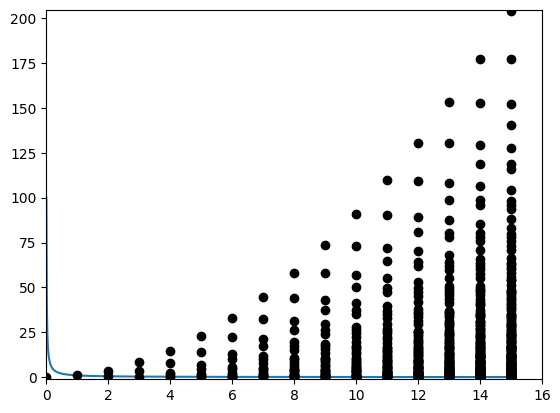

In [37]:
# plt.plot(len(tmp_evals) * [ tmp_Pplus ], tmp_evals, 'o')

tab_x = np.linspace(0.01, maxPplus, 1001)
plt.plot(tab_x, m**2/tab_x);

plt.xlim(0, maxPplus + 1)
plt.ylim(minE-1, maxE+1)

for i, y in enumerate(all_evals):
    plt.plot(len(y) * [i], y, 'ko')

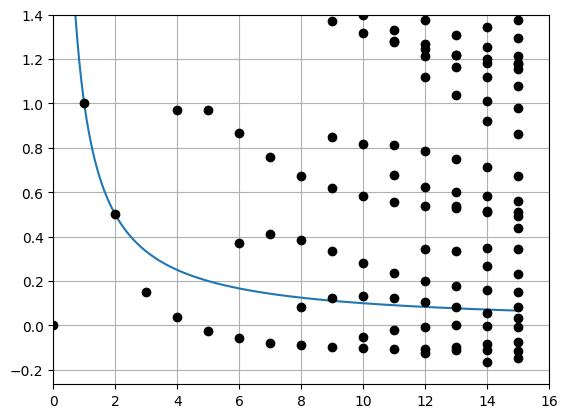

In [52]:
# plt.plot(len(tmp_evals) * [ tmp_Pplus ], tmp_evals, 'o')

tab_x = np.linspace(0.01, maxPplus, 1001)
plt.plot(tab_x, m**2/tab_x);

plt.xlim(0, maxPplus + 1);
plt.ylim(minE-0.1, 1.4);
plt.grid();

for i, y in enumerate(all_evals):
    plt.plot(len(y) * [i], y, 'ko')

/tmp/ipykernel_5620/3612321853.py:10: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(len(y) * [i], -np.sqrt(-i*y), 'ro')
/tmp/ipykernel_5620/3612321853.py:9: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(len(y) * [i], np.sqrt(i*y), 'ko')


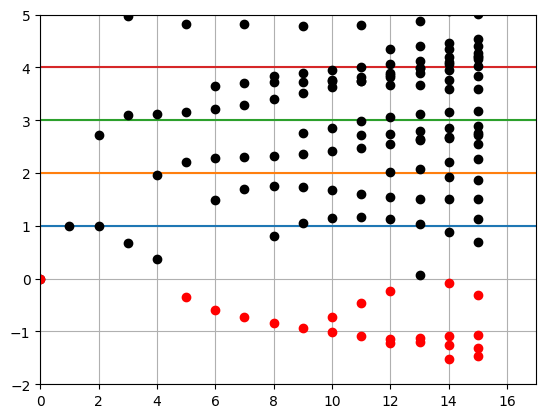

In [45]:
plt.xlim(0, len(all_evals)+1);
plt.ylim(-2, 5);
plt.grid();

for i in range(1,5):
    plt.plot([0, len(all_evals)+1], 2*[ i*m ])

for i, y in enumerate(all_evals):
    plt.plot(len(y) * [i], np.sqrt(i*y), 'ko')
    plt.plot(len(y) * [i], -np.sqrt(-i*y), 'ro')

/tmp/ipykernel_5620/4051739698.py:9: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(len(y) * [i], -np.sqrt(-i*y), 'ro')
/tmp/ipykernel_5620/4051739698.py:8: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(len(y) * [i], np.sqrt(i*y), 'ko')


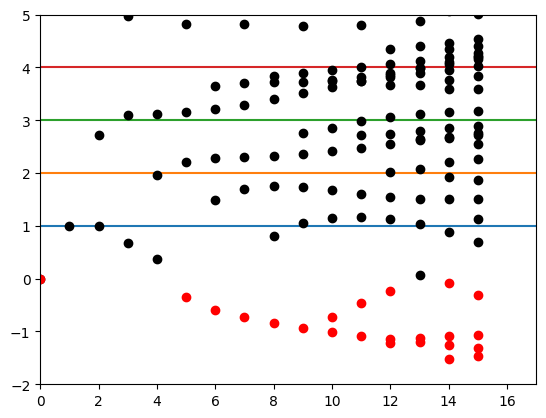

In [49]:
plt.xlim(0, len(all_evals)+1);
plt.ylim(-2, 5);

for i in range(1,5):
    plt.plot([0, len(all_evals)+1], 2*[ i*m ])

for i, y in enumerate(all_evals):
    plt.plot(len(y) * [i], np.sqrt(i*y), 'ko')
    plt.plot(len(y) * [i], -np.sqrt(-i*y), 'ro')